
# **Title of project: Bank Customer Churn Prediction Using ML**

# **Objective**

The objective of the project is to develop a ml model that can accurately predict which customers are likely to leave the bank's services.

# **Data Source**

Bank Customer Churn
(https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv)

13 columns, 10,000 rows

These are the attributes present in the dataset:


***CustomerId***: Contains random values and has no effect on customer leaving the bank.

***Surname***: The surname of a customer has no impact on their decision to leave the bank.

***CreditScore***: Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

***Geography***: A customer’s location can affect their decision to leave the bank.

***Gender***: It’s interesting to explore whether gender plays a role in a customer leaving the bank.

***Age***: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.

***Tenure***: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

***Balance***: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

***Num Of Products***: Refers to the number of products that a customer has purchased through the bank.

***Has Credit Card***: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

***Is Active Member***: Active customers are less likely to leave the bank.

***Estimated Salary***: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

***Churn***: The customer left the bank or not.


# **Import  Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Analysis**

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# **Label Encoding**

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.replace({'Geography' : {'France' : 0, 'Germany' : 1, 'Spain' : 2}}, inplace=True)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.replace({'Gender' : {'Male' : 0, 'Female' : 1}}, inplace=True)

# **Spliting the data into independent variables and dependent varaiable**

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
X = df.drop(['CustomerId', 'Surname', 'Churn'], axis=1)
Y = df['Churn']

In [ ]:
X.shape, Y.shape

((10000, 10), (10000,))

# **Handling Imbalanced Data**

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

***Oversampling***

The simplest oversampling method involves randomly duplicating examples from the minority class in the training dataset, referred to as Random Oversampling.


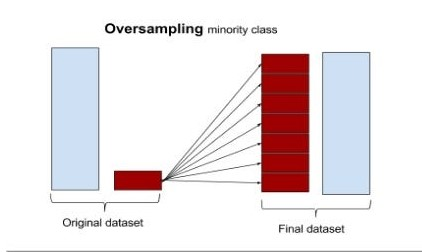

In [ ]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

# **Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=50)
X_ros, Y_ros = ros.fit_resample(X, Y)

In [ ]:
X_ros.shape, Y_ros.shape, X.shape, Y.shape

((15926, 10), (15926,), (10000, 10), (10000,))

In [ ]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
Y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros, Y_ros, test_size=0.3, random_state=100)

# **Standardize Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()

In [ ]:
X_train_ros = sc.fit_transform(X_train_ros)
X_test_ros = sc.fit_transform(X_test_ros)

# **Building Models**

1) Logistic Regression

In [ ]:
# Import necessary module
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression object
lr = LogisticRegression()

# Train Logistic Regression
lr.fit(X_train_ros, Y_train_ros)

# Predict the response for test dataset
predlr = lr.predict(X_test_ros)

In [ ]:
# Accuracy of the Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(Y_test_ros, predlr), '\n')
print("Classification Report:\n", classification_report(Y_test_ros, predlr))

Confusion Matrix:
 [[1484  850]
 [ 639 1805]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67      2334
           1       0.68      0.74      0.71      2444

    accuracy                           0.69      4778
   macro avg       0.69      0.69      0.69      4778
weighted avg       0.69      0.69      0.69      4778



2) K Neighbors Classifier

In [ ]:
# Import necessary module
from sklearn.neighbors import KNeighborsClassifier

# Create KNeighborsClassifier object
knn = KNeighborsClassifier()

# Train KNeighborsClassifier
knn.fit(X_train_ros, Y_train_ros)

# Predict the response for test dataset
predknn = knn.predict(X_test_ros)

In [ ]:
# Accuracy of the KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(Y_test_ros, predknn), '\n')
print("Classification Report:\n", classification_report(Y_test_ros, predknn))

Confusion Matrix:
 [[1676  658]
 [ 328 2116]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77      2334
           1       0.76      0.87      0.81      2444

    accuracy                           0.79      4778
   macro avg       0.80      0.79      0.79      4778
weighted avg       0.80      0.79      0.79      4778



3) Random Forest Classifier

In [ ]:
# Import necessary module
from sklearn.ensemble import RandomForestClassifier

# Create RandomForestClassifier object
rfc = RandomForestClassifier()

# Train RandomForestClassifier
rfc.fit(X_train_ros, Y_train_ros)

# Predict the response for test dataset
predrfc= rfc.predict(X_test_ros)

In [ ]:
# Accuracy of the RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(Y_test_ros, predrfc), '\n')
print("Classification Report:\n", classification_report(Y_test_ros, predrfc))

Confusion Matrix:
 [[2044  290]
 [ 289 2155]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      2334
           1       0.88      0.88      0.88      2444

    accuracy                           0.88      4778
   macro avg       0.88      0.88      0.88      4778
weighted avg       0.88      0.88      0.88      4778



# **Conclusion**

**Machine Learning Models with their Accuracy:**

1) Logistic Regression ---> 0.69

2) K Neighbors Classifier  ---> 0.79

3) Random Forest Classifier  ---> 0.88

So, The Random Forest Classifier Model works better when compared to other models.